<a href="https://colab.research.google.com/github/bhattrahul301/Assignment1/blob/DS-certification/Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown
import ipywidgets as widgets

In [2]:
student_data = pd.ExcelFile(r'/content/Batchwise Attendance Data.xlsx')

In [3]:
student_data.sheet_names

['Class 1', 'Class 2']

In [5]:
sheets = {}

for sheet_name in student_data.sheet_names:
    sheets[sheet_name] = student_data.parse(sheet_name)
    sheets[sheet_name]['Type'].fillna('STUDENT',inplace=True)
    sheets[sheet_name] = sheets[sheet_name].dropna(axis=1, how='all')


In [6]:
total_students = {}
avg_rating = {}
attendence = {}
attendenceByday = {}
avgratingByday = {}

In [7]:
from statistics import mean
for sheet_name in sheets:
    df = sheets[sheet_name]
    total_students[sheet_name] = {}
    total_students[sheet_name]['Total'] = len(df)
    
    
    attendence[sheet_name] = {}
    attendence[sheet_name]['Total'] = (len(df.columns)-2)//2
    attendenceByday[sheet_name] = {}
    avg_rating[sheet_name] = {}
    avgratingByday[sheet_name] = {}
    
    for col in df.columns[2::2]:
        attendenceByday[sheet_name]['Total'] = len(df)
        attendenceByday[sheet_name][str(col).replace('00:00:00','')] = list(df[col]).count('Attended')
    
    for col in df.columns[3::2]:
        avgratingByday[sheet_name][col] = round(mean(df[col]))
        
    for types in df['Type'].unique():
        total_students[sheet_name][types] = len(df[df['Type'] == types])
        temp = df[df['Type'] == types]
        attendence[sheet_name][types] = {}
        avg_rating[sheet_name][types] = {}
        for i in range(len(temp)):
            l = list(temp.iloc[i,:])
            attendence[sheet_name][types][int(l[0])] = l.count('Attended')
            avg_rating[sheet_name][types][int(l[0])] = mean(l[3::2])

In [8]:
avgratingByday

{'Class 1': {'R-10-01-21': 7,
  'R-9-01-21': 8,
  'R-8-01-21': 8,
  'R-7-01-21': 8,
  'R-6-01-21': 7,
  'R-5-01-21': 8,
  'R-4-01-21': 8,
  'R-3-01-21': 7,
  'R-02-01-21': 7,
  'R-01-01-21': 8},
 'Class 2': {'R-10-01-21': 7,
  'R-9-01-21': 8,
  'R-8-01-21': 7,
  'R-7-01-21': 7,
  'R-6-01-21': 7,
  'R-5-01-21': 7,
  'R-4-01-21': 8,
  'R-3-01-21': 8}}

In [9]:
attendenceByday

{'Class 1': {'Total': 57,
  '2021-01-10 ': 26,
  '2021-01-09 ': 25,
  '2021-01-08 ': 27,
  '2021-01-07 ': 30,
  '2021-01-06 ': 28,
  '2021-01-05 ': 28,
  '2021-01-04 ': 32,
  '2021-01-03 ': 27,
  '2021-01-02 ': 34,
  '2021-01-01 ': 30},
 'Class 2': {'Total': 70,
  '2021-01-10 ': 41,
  '2021-01-09 ': 40,
  '2021-01-08 ': 39,
  '2021-01-07 ': 38,
  '2021-01-06 ': 39,
  '2021-01-05 ': 41,
  '2021-01-04 ': 43,
  '2021-01-03 ': 44}}

In [10]:
avg_rating

{'Class 1': {'WORKING': {1: 6,
   5: 7,
   15: 7,
   16: 6,
   22: 7,
   24: 8,
   30: 7,
   36: 7,
   55: 7},
  'STUDENT': {2: 7,
   3: 7,
   4: 7,
   6: 6,
   7: 8,
   8: 7,
   10: 7,
   11: 7,
   12: 7,
   13: 8,
   14: 7,
   17: 7,
   18: 7,
   19: 7,
   20: 7,
   21: 7,
   23: 7,
   25: 8,
   26: 6,
   27: 7,
   28: 7,
   29: 8,
   31: 7,
   32: 8,
   33: 6,
   34: 8,
   35: 7,
   37: 7,
   38: 7,
   39: 6,
   40: 6,
   41: 8,
   42: 7,
   43: 8,
   44: 7,
   45: 8,
   46: 6,
   47: 6,
   48: 8,
   49: 6,
   51: 7,
   53: 8,
   54: 8,
   56: 7,
   57: 6},
  'IGNORE': {9: 7, 50: 6},
  'DROPOUT': {52: 7}},
 'Class 2': {'STUDENT': {1: 7,
   2: 6,
   3: 7,
   4: 7,
   7: 7,
   9: 6,
   10: 8,
   12: 7,
   16: 7,
   17: 7,
   18: 8,
   20: 7,
   21: 7,
   22: 7,
   24: 8,
   25: 6,
   26: 6,
   27: 7,
   28: 8,
   30: 7,
   31: 6,
   33: 8,
   34: 6,
   36: 7,
   37: 6,
   38: 7,
   39: 7,
   41: 8,
   42: 7,
   43: 6,
   45: 7,
   46: 7,
   47: 7,
   50: 7,
   51: 7,
   54: 7,
   55: 

In [11]:
attendence

{'Class 1': {'Total': 10,
  'WORKING': {1: 0, 5: 0, 15: 10, 16: 6, 22: 10, 24: 8, 30: 6, 36: 0, 55: 3},
  'STUDENT': {2: 4,
   3: 4,
   4: 5,
   6: 4,
   7: 10,
   8: 0,
   10: 0,
   11: 10,
   12: 10,
   13: 10,
   14: 9,
   17: 5,
   18: 0,
   19: 0,
   20: 6,
   21: 0,
   23: 0,
   25: 10,
   26: 9,
   27: 4,
   28: 10,
   29: 9,
   31: 10,
   32: 0,
   33: 0,
   34: 10,
   35: 0,
   37: 2,
   38: 9,
   39: 0,
   40: 8,
   41: 10,
   42: 7,
   43: 0,
   44: 10,
   45: 10,
   46: 3,
   47: 9,
   48: 6,
   49: 0,
   51: 0,
   53: 5,
   54: 9,
   56: 8,
   57: 9},
  'IGNORE': {9: 0, 50: 0},
  'DROPOUT': {52: 0}},
 'Class 2': {'Total': 8,
  'STUDENT': {1: 7,
   2: 8,
   3: 0,
   4: 6,
   7: 0,
   9: 8,
   10: 6,
   12: 8,
   16: 2,
   17: 8,
   18: 7,
   20: 6,
   21: 0,
   22: 0,
   24: 5,
   25: 8,
   26: 8,
   27: 8,
   28: 6,
   30: 6,
   31: 8,
   33: 7,
   34: 8,
   36: 8,
   37: 8,
   38: 2,
   39: 0,
   41: 8,
   42: 2,
   43: 0,
   45: 7,
   46: 8,
   47: 0,
   50: 8,
   51: 8,

In [12]:
total_students

{'Class 1': {'Total': 57,
  'WORKING': 9,
  'STUDENT': 45,
  'IGNORE': 2,
  'DROPOUT': 1},
 'Class 2': {'Total': 70,
  'STUDENT': 49,
  'WORKING': 16,
  'IGNORE': 2,
  'DROPOUT': 3}}

**Which student needs attention for missing sessions?**

interactive(children=(Dropdown(description='Class', options=('Class 1', 'Class 2'), value='Class 1'), Output()…

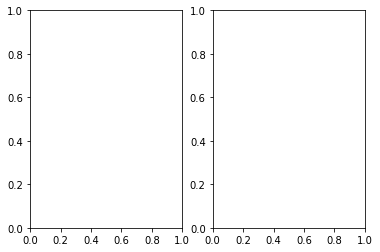

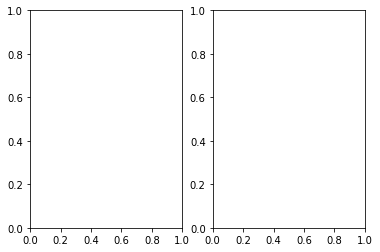

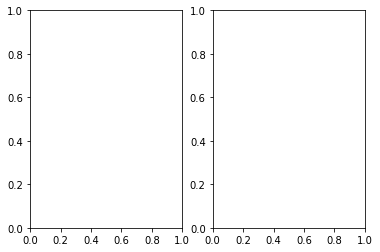

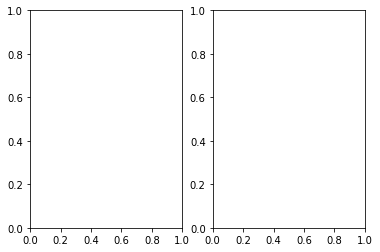

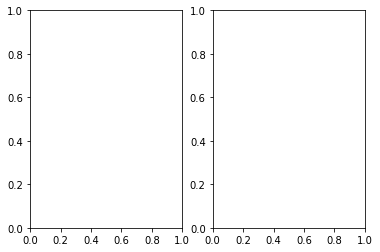

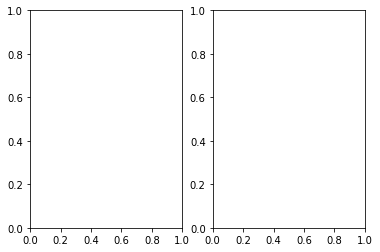

In [14]:
Class = Dropdown(options = student_data.sheet_names)

@interact(Class = Class)
def chooseClass(Class):
    studs = []
    leastat = min(attendence[Class]['STUDENT'].values())
    for roll in attendence[Class]['STUDENT']:
        if attendence[Class]['STUDENT'][roll] == leastat:
            studs.append(roll)
    
    print('least attendence in the class is ',leastat)
    print('student roll numbers having least attendence',studs)
    fig, ax = plt.subplots(1, 2)
    
    plt.subplot(1, 2, 1)
    plt.plot(attendence[Class]['STUDENT'].keys(), attendence[Class]['STUDENT'].values())
    plt.title('attendence of the all students for '+ str(attendence[Class]['Total']) +' session' )
    plt.xlabel('Student Roll Numbers')
    
    plt.subplot(1,2,2)
    temp = [avg_rating[Class]['STUDENT'][key] for key in avg_rating[Class]['STUDENT'] if key in studs]
    plt.title('students with least attendence average rating')
    plt.xlabel('Student Roll Numbers')
    plt.bar(height = temp, x=studs)
    plt.subplots_adjust(left=1,
                    bottom=1, 
                    right=3, 
                    top=2, 
                    wspace=0.2, 
                    hspace=0.2)
    plt.show()
    

**Which students are unsatisfied?**

interactive(children=(Dropdown(description='Class', options=('Class 1', 'Class 2'), value='Class 1'), Output()…

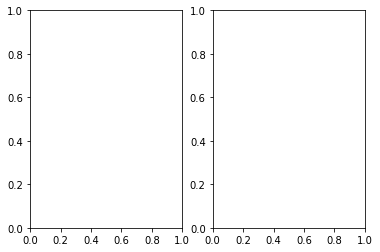

In [15]:
Class = Dropdown(options = student_data.sheet_names)

@interact(Class = Class)
def chooseClass(Class):
    studs = []
    leastat = min(avg_rating[Class]['STUDENT'].values())
    for roll in avg_rating[Class]['STUDENT']:
        if avg_rating[Class]['STUDENT'][roll] == leastat:
            studs.append(roll)
    print('least rating in the class is ',leastat)
    print('student roll numbers who rated',studs)
    
    fig, ax = plt.subplots(1, 2)
    
    plt.subplot(1, 2, 1)
    plt.plot(avg_rating[Class]['STUDENT'].keys(), avg_rating[Class]['STUDENT'].values())
    plt.title('Average rating of each student for '+ Class )
    plt.xlabel('Student Roll Numbers')
    
    
    plt.subplot(1,2,2)
    temp = [attendence[Class]['STUDENT'][key] for key in attendence[Class]['STUDENT'] if key in studs]
    print('attendence of the students who rated least', temp)
    plt.title('students attendence who rated least')
    plt.xlabel('Student Roll Numbers')
    plt.bar(height = temp, x=studs)
    plt.subplots_adjust(left=1,
                    bottom=1, 
                    right=3, 
                    top=2, 
                    wspace=0.2, 
                    hspace=0.2)
    plt.show()

**Which students are very satisfied?**

interactive(children=(Dropdown(description='Class', options=('Class 1', 'Class 2'), value='Class 1'), Output()…

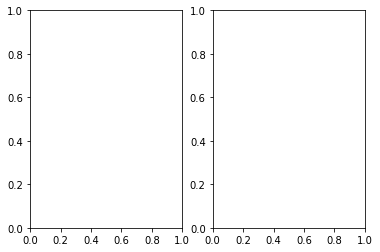

In [16]:
Class = Dropdown(options = student_data.sheet_names)

@interact(Class = Class)
def chooseClass(Class):
    studs = []
    maxval = max(avg_rating[Class]['STUDENT'].values())
    for roll in avg_rating[Class]['STUDENT']:
        if avg_rating[Class]['STUDENT'][roll] == maxval:
            studs.append(roll)
    print('highest rating in the class is ',maxval)
    print('student roll numbers who rated',studs)
    
    fig, ax = plt.subplots(1, 2)
    
    plt.subplot(1, 2, 1)
    plt.plot(avg_rating[Class]['STUDENT'].keys(), avg_rating[Class]['STUDENT'].values())
    plt.title('Average rating of each student for '+ Class )
    plt.xlabel('Student Roll Numbers')
    
    plt.subplot(1,2,2)
    temp = [attendence[Class]['STUDENT'][key] for key in attendence[Class]['STUDENT'] if key in studs]
    print('attendence of the students who rated highest',temp)
    plt.title('students attendence who rated highest')
    plt.xlabel('Student Roll Numbers')
    plt.bar(height = temp, x=studs)
    plt.subplots_adjust(left=1,
                    bottom=1, 
                    right=3, 
                    top=2, 
                    wspace=0.2, 
                    hspace=0.2)
    plt.show()

**SOME EXTRA INSIGHTS**

In [20]:
Class = Dropdown(options = student_data.sheet_names)
t = list(total_students[student_data.sheet_names[0]].keys())
t.remove('Total')
# CType.options = t
CType = Dropdown(options=t)

@interact(Class = Class,Type = CType)
def chooseClassandType(Class,Type):
    plt.subplot(1, 2, 1)
    temp = avg_rating[Class][Type].copy()
    if 'Total' in temp:
        del temp['Total']
    plt.bar(x = temp.keys() , height = temp.values())
    plt.title('Average rating of each student in '+ Class +' and Type ' + Type  )
    plt.xlabel('Student Roll Numbers')
    
    plt.subplot(1,2,2)
    temp = attendence[Class][Type].copy()
    if 'Total' in temp:
        del temp['Total']
    plt.bar(height = temp.values(), x=temp.keys())
    plt.xlabel('Student Roll Numbers')
    plt.title('Average attendence of students')
    plt.subplots_adjust(left=1,
                    bottom=1, 
                    right=3, 
                    top=2, 
                    wspace=0.2, 
                    hspace=0.2)
    plt.show()

interactive(children=(Dropdown(description='Class', options=('Class 1', 'Class 2'), value='Class 1'), Dropdown…

In [21]:
Class = Dropdown(options = student_data.sheet_names)

@interact(Class = Class)
def chooseClass(Class):
    #plt.figure(figsize=(10,10))
    
    fig, ax = plt.subplots(2, 2)
    
    plt.subplot(2, 2, 1)
    palette_color = sns.color_palette('dark')
    temp = total_students[Class].copy()
    if 'Total' in temp:
        del temp['Total']
    #print(temp)
    plt.pie(temp.values(), labels=temp.keys(), colors=palette_color, autopct='%.0f%%',shadow= True)
    plt.title('Ratio of Different category of people in '+Class)
    #plt.show()
    
    plt.subplot(2, 2, 2)
    temp = {}
    for key in attendence[Class]:
        if key != 'Total':
            temp[key] = mean(attendence[Class][key].values())
    #print(temp)
    plt.bar(height = temp.values(), x=temp.keys())
    plt.title('average attendence by category in '+Class +' out of '+ str(attendence[Class]['Total']) +' sessions' )
    plt.xlabel('Type')
    
    plt.subplot(2, 2, 3)
    temp = {}
    for key in avg_rating[Class]:
        if key != 'Total':
            temp[key] = mean(avg_rating[Class][key].values())
    #print(temp)
    plt.bar(height = temp.values(), x=temp.keys())
    plt.title('average rating by category in '+Class +' for '+ str(attendence[Class]['Total']) +' sessions' )
    plt.xlabel('Type')
    
    
    plt.subplot(2, 2, 4)
    temp = attendenceByday[Class].copy()
    if 'Total' in temp:
        del temp['Total']
    #print(temp)
    year, mon, d = list(temp.keys())[0].split('-')
    vals = [k.split('-')[2] for k in temp.keys()]
    plt.bar(height = temp.values(), x=vals)
    plt.title('no of students attended by dates [year - '+year+ ' month - '+ mon +' ]')
    plt.xlabel('day of the month')
    
    plt.subplots_adjust(left=1,
                    bottom=1, 
                    right=3, 
                    top=3, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.show()
    
    

interactive(children=(Dropdown(description='Class', options=('Class 1', 'Class 2'), value='Class 1'), Output()…